## Exercise 8.4
### 1. Multiple time series on common axes

For this exercise, you will construct a plot showing four time series stocks on the same axes. The time series in question are represented using the identifiers `aapl`, `ibm`, `csco`, and `msft`. You'll generate a single plot showing all the time series on common axes with a legend.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# import the dataset
stocks = pd.read_csv("https://github.com/huangpen77/BUDT704/raw/main/Chapter09/stocks.csv")

# first column is DateTime. Let's make it index
stocks2 = stocks.set_index("Date")

# the type is still not DateTime Index. 
stocks2.index = pd.to_datetime(stocks2.index)

# read the time series arrays
aapl = stocks2[["AAPL"]]
ibm = stocks2[["IBM"]]
csco = stocks2[["CSCO"]]
msft = stocks2[["MSFT"]]

#### Instructions (2 points)

- Plot the `aapl` time series in blue with a label of `'AAPL'`.
- Plot the `ibm` time series in green with a label of `'IBM'`.
- Plot the `csco` time series in red with a label of `'CSCO'`.
- Plot the `msft` time series in yellow with a label of `'MSFT'`.
- Add a legend in the `'upper left'` corner of the plot.

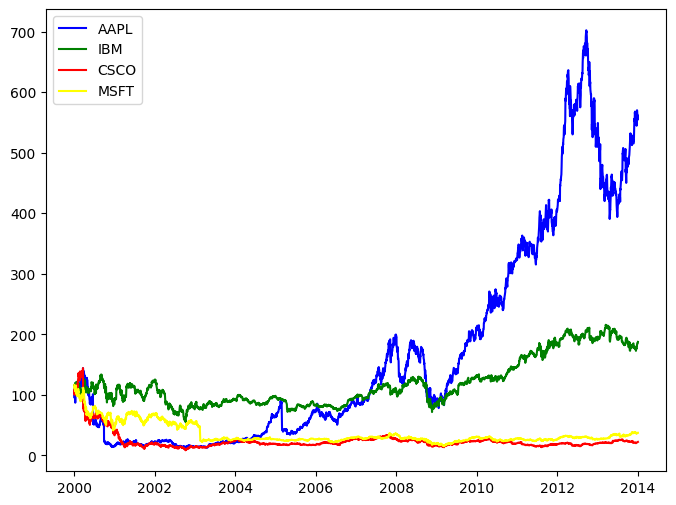

In [3]:
fig = plt.figure()
fig.set_size_inches(8,6)

# Plot the aapl time series in blue
plt.plot(aapl, color='blue', label='AAPL')

# Plot the ibm time series in green
plt.plot(ibm, color='green', label='IBM')

# Plot the csco time series in red
plt.plot(csco, color='red', label='CSCO')

# Plot the msft time series in yellow
plt.plot(msft, color='yellow', label='MSFT')

# Add a legend in the upper left corner of the plot
plt.legend(loc='upper left')

# Display the plot
plt.show()

### 2. Multiple time series slices

In this exercise, you will use the same time series `aapl` from the previous exercise and plot tighter views of the data.

Partial string indexing works without slicing as well. For instance, using 
```
`my_time_series['1995']`, 
`my_time_series['1999-05']`, 
and `my_time_series['2000-11-04']` 
```
respectively extracts views of the time series `my_time_series` corresponding to 
```
the entire year 1995, 
the entire month May 1999, 
and the entire day November 4, 2000.
```

#### Instructions (3 points)

- Extract a slice named `view_1` from the series `aapl` containing data from *November 2007* to *April 2008* (inclusive). 
- Plot the slice `view_1` in `'red'` in the top subplot of a vertically-stacked pair of subplots.
- Assign the slice `view_2` to contain data from the series `aapl` for *January 2008*. 
- Plot the slice `view_2` in `'green'` in the bottom subplot.

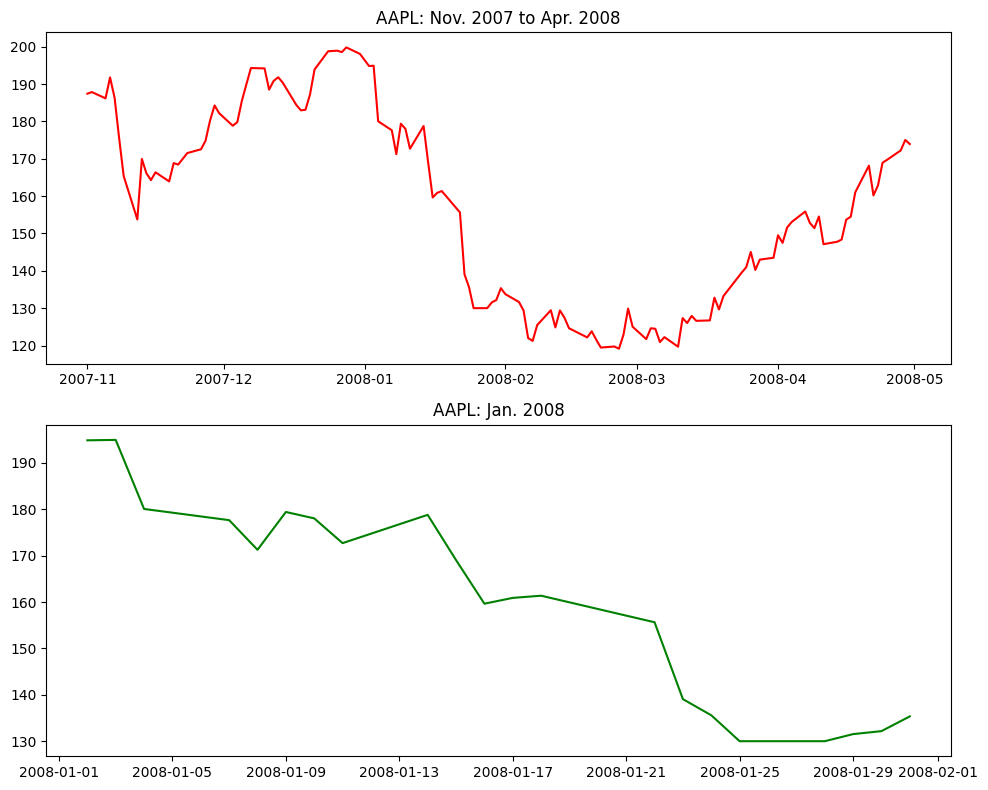

In [4]:
fig = plt.figure()
fig.set_size_inches(10,8)

# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view_1 = aapl.loc['2007-11':'2008-04']

# Plot the sliced series in the top subplot in red
plt.subplot(2,1,1)
plt.title('AAPL: Nov. 2007 to Apr. 2008')
plt.plot(view_1, color='red')

# Reassign the series by slicing the month January 2008
view_2 = aapl.loc['2008-01']

# Plot the sliced series in the bottom subplot in green
plt.subplot(2,1,2)
plt.title('AAPL: Jan. 2008')
plt.plot(view_2, color='green')

# Improve spacing and display the plot
plt.tight_layout()
plt.show()

## Exercise 8.5
### 1: A simply bar chart
To practice our bar chart, we’ll use a very bar-related dataset from Kaggle — Alcohol Consumption around the World. The dataset provides the per capita consumption of **beer**, **wine** and **spirit** per year by each country. It also calculates a total of **pure alcohol** consumed. In this exercise we will create a bar chart of total pure alcohol consumption by the top five countries.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

drinks = pd.read_csv('https://github.com/huangpen77/BUDT704/raw/main/Chapter09/drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


#### Instructions (2 points)
- create a dataframe `top5_alcohol`from `drinks` that includes the top five counties that consumes the most `total_litres_of_pure_alcohol`. To do this, first sort the dataframe by values of `total_litres_of_pure_alcohol` in `descending` order, and subset the first 5 rows.
- reset the index of `top5_alcohol` so that the dataframe has a RangeIndex 0-4. Use options `drop=True` and `inplace=True`.

In [11]:
# create a dataframe `top5_alcohol`from `drinks` that includes the top five counties that consumes the most `total_litres_of_pure_alcohol`
top5_alcohol = drinks.sort_values('total_litres_of_pure_alcohol', ascending=False)[0:4]
# reset the index of `top5_alcohol` so that the dataframe has a RangeIndex 0-4.
top5_alcohol.reset_index(drop=True, inplace=True)
     
top5_alcohol

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Belarus,142,373,42,14.4
1,Lithuania,343,244,56,12.9
2,Andorra,245,138,312,12.4
3,Grenada,199,438,28,11.9


#### Instructions (2 points)
- create a bar chart, where the x-axis is the `country` column of DataFrame `top5_alcohol` and the y-axis is the `total_litres_of_pure_alcohol` column.
- set the `title` of the plot to 'TOP5 countries by pure alcohol consumption', `xlabel` to 'Countries', and `ylabel` to 'Litres per person'.

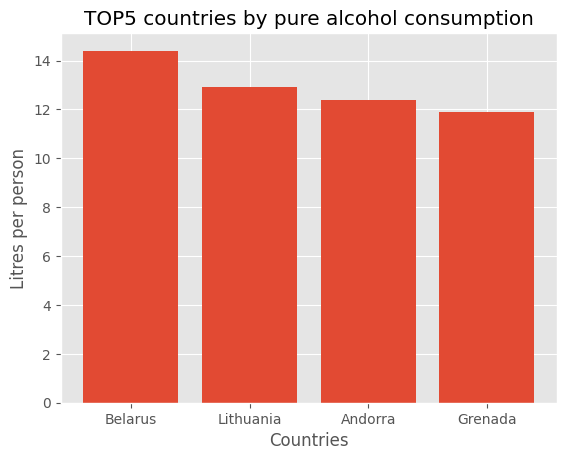

In [13]:
plt.style.use("ggplot")
fig, ax = plt.subplots() 

# create a bar chart, where the x-axis is the `country` column of `top5_alcohol` and the y-axis is the `total_litres_of_pure_alcohol` column.
ax.bar(top5_alcohol['country'], top5_alcohol['total_litres_of_pure_alcohol'])

# set the `title` of the plot to 'TOP5 countries by pure alcohol consumption', `xlabel` to 'Countries', and `ylabel` to 'Litres per person'.
ax.set_title('TOP5 countries by pure alcohol consumption')
ax.set_xlabel('Countries')
ax.set_ylabel('Litres per person')

plt.show()

### 2: Stacked bars
In this exercise we will plot the consumption of `beer`, `wine` and `spirit` for the top five countries using a bar chart with stacked bars.

#### Instructions (3 points)
- create variable `bar_width` and assigne a value of `0.5`.
- create the first bar representing `wine`. The data is from `wine_servings` column of dataframe `top5_alcohol`. Use `bar_width` as the width, `red` as the color, as `wine` as the label.
- create the second bar representing `beer` which will stack on `wine`. The data is from `beer_servings` column of dataframe `top5_alcohol`. Use `bar_width` as the with, `blue` as the color, as `beer` as the label.
- create the third bar representing `spirit` which will stack on `wine`+`beer`. The data is from `spirit_servings` column of dataframe `top5_alcohol`. Use `bar_width` as the with, `yellow` as the color, as `spirit` as the label.
- use `set_xticks()` to set the x-axis ticks. Use `top5_alcohol['country']` as `labels`, and rotate the labes by `45` degrees.

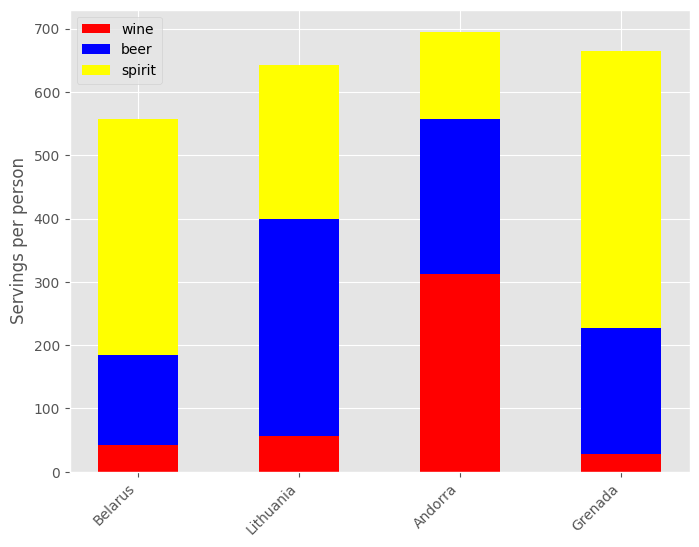

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
# create variable `bar_width` and assigne a value of `0.5`.
bar_width = 0.5
# create the first bar representing `wine`.
ax.bar(top5_alcohol.index, top5_alcohol['wine_servings'], width=bar_width, color='red', label='wine')
# create the second bar representing `beer` which will stack on `wine`.
ax.bar(top5_alcohol.index, top5_alcohol['beer_servings'], width=bar_width, bottom=top5_alcohol['wine_servings'], color='blue', label='beer')
# create the third bar representing `spirit` which will stack on `wine`+`beer`.
ax.bar(top5_alcohol.index, top5_alcohol['spirit_servings'], width=bar_width, bottom=top5_alcohol['wine_servings'] + top5_alcohol['beer_servings'], color='yellow', label='spirit')
# Set x-axis ticks. Use `top5_alcohol['country']` as `labels`, and rotate the labes by `45` degrees.
ax.set_xticks(top5_alcohol.index, labels=top5_alcohol['country'], rotation=45, ha='right')
ax.set_ylabel('Servings per person') 
ax.legend(loc='upper left')
plt.show()

### 3. Pie Chart (3 points)
In this exercise we will practice creating a pie chart. The data include the number of students enrolled in 4 programming courses.
####  Instructions
- create a list of labels for each language of 'Python', 'C++', 'Ruby' and 'Java'.
- create a list of colors including 'gold', 'yellowgreen', 'lightcoral' and 'lightskyblue'.
- use `plt.pie()` method to create a pie chart. In the pie chart, we want to display the percentage (keep 1 decimal point) of students enrolled in each language, and use custom colors and explode as you created in the lists `colors` and `explode`.

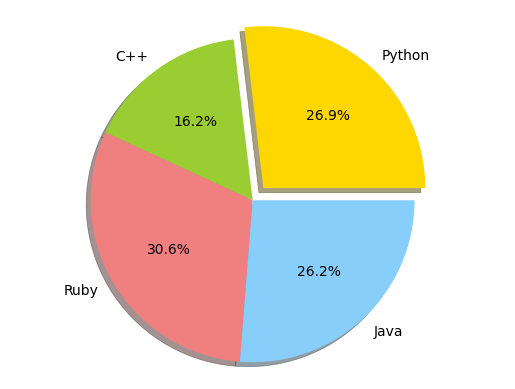

In [16]:
import matplotlib.pyplot as plt

# Data to plot
labels = ['Python', 'C++', 'Ruby', 'Java']
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode the 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%.1f%%', shadow=True)

plt.axis('equal')
plt.show()

Note that we used `shadow=True` parameter when calling `plt.pie()`. See how the visual effects change.

## Exercise 8.6
### 1. Plotting histograms
In this exercise we will use the auto MPG data to practice creating histograms. The origin of the cars are one of the following: `US`, `Europe`, and `Asia`. We will plot some histograms of the auto MPG by their origin. To get started, run the code below to examine the data. 

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

auto = pd.read_csv('https://github.com/huangpen77/BUDT704/raw/main/Chapter09/auto-mpg.csv')
auto.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,color,size,marker
0,18.0,6,250.0,88,3139,14.5,71,US,ford mustang,red,27.370336,o
1,9.0,8,304.0,193,4732,18.5,70,US,hi 1200d,green,62.199511,o
2,36.1,4,91.0,60,1800,16.4,78,Asia,honda civic cvcc,blue,9.000000,x
3,18.5,6,250.0,98,3525,19.0,77,US,ford granada,red,34.515625,o
4,34.3,4,97.0,78,2188,15.8,80,Europe,audi 4000,blue,13.298178,s


In [18]:
us_auto = auto[auto['origin'] =='US']
eu_auto = auto[auto['origin']=='Europe']
display(us_auto.head(), eu_auto.head())

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,color,size,marker
0,18.0,6,250.0,88,3139,14.5,71,US,ford mustang,red,27.370336,o
1,9.0,8,304.0,193,4732,18.5,70,US,hi 1200d,green,62.199511,o
3,18.5,6,250.0,98,3525,19.0,77,US,ford granada,red,34.515625,o
8,15.0,8,302.0,130,4295,14.9,77,US,mercury cougar brougham,green,51.241736,o
9,17.0,8,302.0,140,3449,10.5,70,US,ford torino,green,33.043336,o


,mpg,cyl,displ,hp,weight,accel,yr,origin,name,color,size,marker
4,34.3,4,97.0,78,2188,15.8,80,Europe,audi 4000,blue,13.298178,s
7,22.0,4,121.0,76,2511,18.0,72,Europe,volkswagen 411 (sw),blue,17.514225,s
10,44.0,4,97.0,52,2130,24.6,82,Europe,vw pickup,blue,12.602500,s
16,36.0,4,79.0,58,1825,18.6,77,Europe,renault 5 gtl,blue,9.251736,s
25,26.0,4,98.0,90,2265,15.5,73,Europe,fiat 124 sport coupe,blue,14.250625,s


#### Instructions (2 points)
- first, create a bar chart plotting the ***mean*** MPG of the cars in `us_auto` and `eu_auto`. The x-axes are `US cars` and `European cars`.
- set the ylabel to `Average MPG`.

/var/folders/1w/b_mz30sd1qx678p0b29bk6z40000gn/T/ipykernel_25506/2835402888.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax.bar('US cars', us_auto.mean())
/var/folders/1w/b_mz30sd1qx678p0b29bk6z40000gn/T/ipykernel_25506/2835402888.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax.bar('European cars', eu_auto.mean())


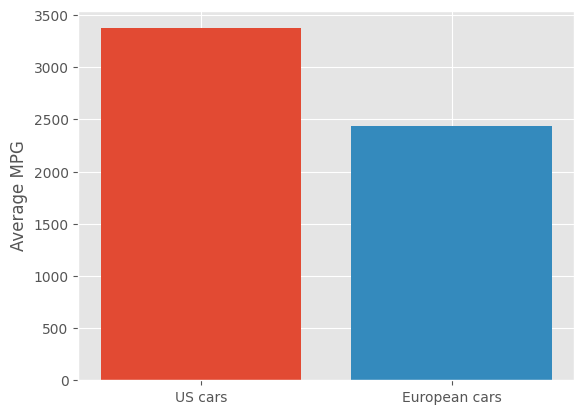

In [20]:
fig, ax = plt.subplots()
# create a bar plotting the mean MPG of the cars in `us_auto`, with x-axis `US cars`
ax.bar('US cars', us_auto.mean())
# create a bar plotting the mean MPG of the cars in `eu_auto`, with x-axis `European cars`
ax.bar('European cars', eu_auto.mean())
# set the ylabel to `Average MPG`
ax.set_ylabel('Average MPG')
plt.show()

#### Instructions (1 point)
- Now create two histograms for the distribution of `mpg` for cars in `us_auto` and `eu_auto`
- set the xlabel to `MPG`
- set the ylabel to `# of observations`

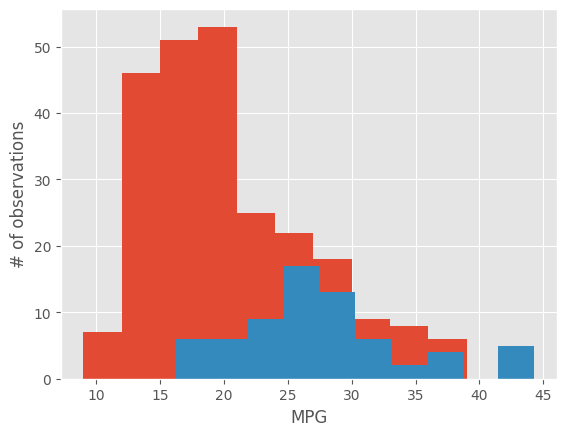

In [21]:
fig, ax = plt.subplots()
# create a histogram for the distribution of `mpg` for cars in `us_auto
ax.hist(us_auto['mpg'])
# create a histogram for the distribution of `mpg` for cars in `eu_auto`
ax.hist(eu_auto['mpg'])
# set the xlabel to `MPG`
ax.set_xlabel('MPG')
# set the ylabel to `# of observations`
ax.set_ylabel('# of observations')
plt.show()

#### Instructions (1 point)
Now improve the histograms by:
- adding transparency by using `alpha=0.3` for both histograms
- add label `US cars` to the first histogram and `European cars` to the second
- create a legend for the plot

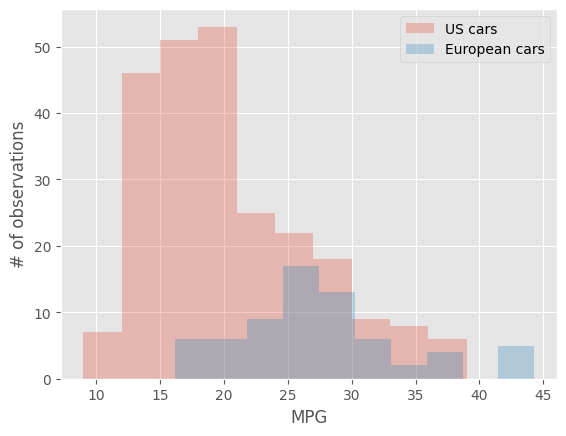

In [22]:
fig, ax = plt.subplots()
# adding transparency by using `alpha=0.3`; add label 'US cars'
ax.hist(us_auto['mpg'], label='US cars', alpha=0.3)
# adding transparency by using `alpha=0.3`; add label 'European cars'
ax.hist(eu_auto['mpg'], label='European cars', alpha=0.3)
# set the xlabel to `MPG`
ax.set_xlabel('MPG')
# set the ylabel to `# of observations`
ax.set_ylabel('# of observations')
# add legend
ax.legend()
plt.show()

#### Instructions (1 point)
- Now modify the plot by specifying `histtype='step'` for both histograms. See how it changes the plot visially.

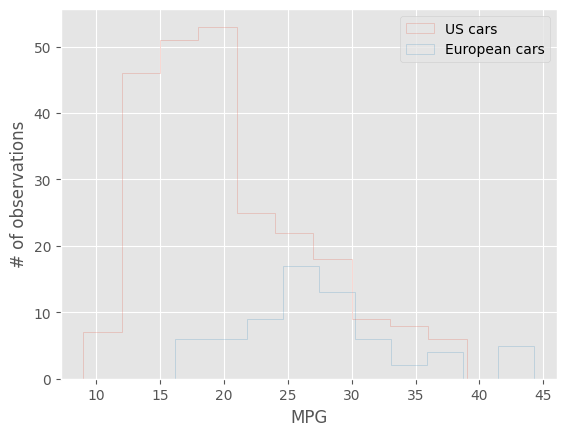

In [23]:
fig, ax = plt.subplots()
# Now modify the plot by specifying `histtype='step'` for both histograms
ax.hist(us_auto['mpg'], label='US cars', alpha=0.3, histtype='step')
ax.hist(eu_auto['mpg'], label='European cars', alpha=0.3, histtype='step')
# set the xlabel to `MPG`
ax.set_xlabel('MPG')
# set the ylabel to `# of observations`
ax.set_ylabel('# of observations')
# add legend
ax.legend()
plt.show()